<a href="https://colab.research.google.com/github/crcifuentesc/se-ales/blob/main/trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Señales y sistemas**

Funcion Cuasi Periodica

$x(t) = 8\cos(100t) + 10\sin(20t) - 7\cos\left(300t - \frac{\pi}{7}\right)$


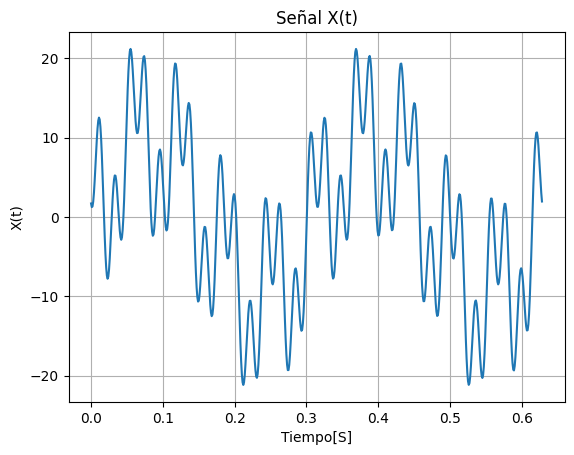

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t=np.arange(0,2*np.pi/10,0.001)
x= 8*np.cos(100*t) + 10*np.sin(20*t) - 7*np.cos(300*t - np.pi/7)

x_1= 8*np.cos(100*t)
x_2= 10*np.sin(20*t)
x_3= - 7*np.cos(300*t - np.pi/7)

# Graficar la función original
plt.plot(t,x)
plt.xlabel("Tiempo[S]")
plt.ylabel("X(t)")
plt.title("Señal X(t)")
plt.grid(True)
plt.show()




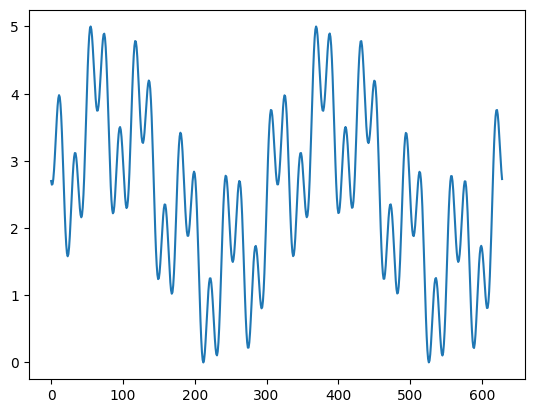

In [ ]:
#crear funcion en python
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv
y2= my_ceropen(x,0,5)
plt.plot(y2)


In [ ]:
from scipy.spatial.distance import cdist

#señal original
Fo = 60
To = 1/60
A = 120
Fs = 10*Fo #asegurar nyquist
Ts = 1/Fs
tv = t
y = y2

#cero y pendiente
ycs = my_ceropen(y, ymin=0,ymax=5)

#número de bits y vector de cuantización
nbits = 3
rmin = 0
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#distancias y cero pendiente a vector cuantizacion
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve




(629, 8)

In [ ]:
#se requiere identificar el elemento ve[j] más cercano a y[i] para genera señal cuantizada
ind = np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila
ind

array([4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 4, 4, 4, 3, 3, 2,
       2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 6, 6, 5, 5, 4, 4, 4, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4,
       4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 3, 3, 3,
       4, 4, 5, 5, 5, 5, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 3, 3, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4,
       4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4,
       4, 3, 3, 3, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3,

In [ ]:
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [ ]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

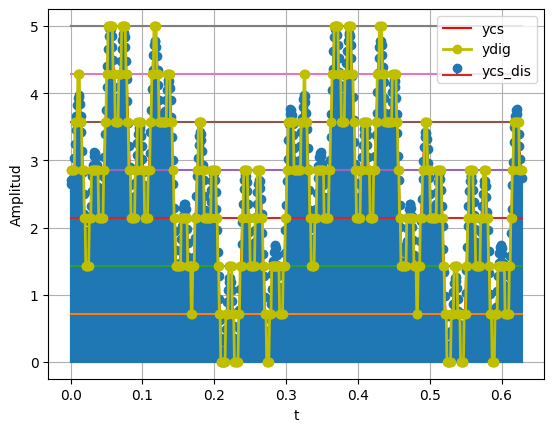

In [ ]:
#graficar señales

plt.plot(tv,ycs,c='r', label='ycs')#cs continua

plt.stem(tv,ycs, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()